In [5]:
import pandas as pd
df = pd.read_csv("insurance.csv")
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [6]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [7]:
df=pd.get_dummies(df,drop_first=True)
df

,age,bmi,children,expenses,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.9,0,16884.92,0,1,0,0,1
1,18,33.8,1,1725.55,1,0,0,1,0
2,28,33.0,3,4449.46,1,0,0,1,0
3,33,22.7,0,21984.47,1,0,1,0,0
4,32,28.9,0,3866.86,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,31.0,3,10600.55,1,0,1,0,0
1334,18,31.9,0,2205.98,0,0,0,0,0
1335,18,36.9,0,1629.83,0,0,0,1,0
1336,21,25.8,0,2007.95,0,0,0,0,1


In [13]:
x=df[['age','bmi','smoker_yes']]
y=df['expenses']
print(x.shape)
print(y.shape)

(1338, 3)
(1338,)


In [14]:
df.columns

Index(['age', 'bmi', 'children', 'expenses', 'sex_male', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42) # train_size=0.8
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1070, 3)
(268, 3)
(1070,)
(268,)


In [16]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(y_pred)
print(type(y_pred))

[ 8.19094025e+03  7.42404188e+03  3.73491913e+04  8.61363313e+03
  2.73093861e+04  1.11183328e+04  5.64858240e+02  1.72672105e+04
  1.20111843e+03  1.03716050e+04  2.77132671e+04  8.91697498e+03
  5.47763755e+03  3.77423077e+04  4.08839469e+04  3.68586188e+04
  1.49439412e+04  3.61074493e+04  9.39746220e+03  3.19018929e+04
  2.57846286e+03  1.00889562e+04  3.14496224e+03  6.99314491e+03
  1.04350429e+04  1.29749626e+04  1.53151626e+04  5.22012357e+03
  9.16696420e+03  2.78758844e+03  8.23300574e+03  1.34592122e+04
  5.13343207e+03  2.60171645e+03  4.83009023e+03  1.29592337e+04
  2.35737080e+03  9.20714850e+03  3.33219821e+04  3.27968689e+04
  2.55709044e+03  4.24974318e+03  1.45061988e+04  1.19204512e+04
  8.54010996e+03  1.25736421e+04  4.70885799e+03  2.70910103e+03
  3.48739114e+04  8.87046778e+03  1.64852627e+04  2.55897163e+03
  1.21848106e+04  1.48120667e+03  1.40489651e+04  1.17414246e+04
  4.39799139e+03  3.12386167e+04  1.41431814e+04  1.29115247e+04
  1.50155832e+04  1.01460

In [17]:
diff = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
diff

,Actual,Predicted
764,9095.07,8190.940247
887,5272.18,7424.041883
890,29330.98,37349.191333
1293,9301.89,8613.633134
259,33750.29,27309.386091
...,...,...
109,47055.53,39767.878803
575,12222.90,12216.268288
535,6067.13,7289.641328
543,63770.43,41450.446266


In [18]:
print("Coefficients : ",model.coef_)
print("Intercept : ",model.intercept_)

Coefficients :  [  259.39516576   326.59544344 23674.53068259]
Intercept :  -11712.047387222743


In [19]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
print("MSE : ",mean_squared_error(y_test,y_pred))
print("MAE : ",mean_absolute_error(y_test,y_pred))
print("R2 Score : ",r2_score(y_test,y_pred))

MSE :  34515867.9306065
MAE :  4261.061610818272
R2 Score :  0.7776737555148191


In [20]:
from sklearn.model_selection import train_test_split
l=[]
for i in range(43):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    l.append(r2_score(y_test,y_pred))
print(l)

[0.7945822974921597, 0.7567996129313421, 0.745830826829319, 0.7421155916489433, 0.6958420500890299, 0.7793612299227516, 0.7765431497128281, 0.7613420929522285, 0.7212526456618211, 0.7721240981746296, 0.6944021496554724, 0.801102111923785, 0.7019374781694582, 0.797214997098281, 0.7283752118155966, 0.7750217232372327, 0.7083650716445468, 0.7254690801478356, 0.7639523770859027, 0.7453094050697274, 0.7963232844246224, 0.7317663432451136, 0.7531055392454545, 0.7573942865613698, 0.7701995709920456, 0.7617773081270375, 0.7324677398267279, 0.7242677550404192, 0.7009104854297334, 0.7065412538047269, 0.7573064716979157, 0.7032837232143732, 0.7818134387841049, 0.7060802961217232, 0.7414051086574442, 0.7168425865196568, 0.7501654839310067, 0.7134874300430007, 0.7086201806862302, 0.7445979347408722, 0.734352287945492, 0.6834049666048642, 0.7776737555148191]


In [21]:
print("Maximun accuary of random state : ",l.index(max(l)))

Maximun accuary of random state :  11


In [22]:
import pandas as pd
df = pd.read_csv("FuelConsumptionCo2.csv")
df

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [24]:
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [25]:
x=df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']]
y=df['CO2EMISSIONS']
print(x.shape)
print(y.shape)

(1067, 3)
(1067,)


In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42) # train_size=0.8
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(853, 3)
(214, 3)
(853,)
(214,)


In [27]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(y_pred)
print(type(y_pred))

[302.95237705 240.91489956 272.50244127 235.31017981 204.07702562
 245.78307279 304.87320139 283.65078533 309.17145244 307.72944493
 287.73574015 391.1248773  252.78536659 251.38779254 262.02954829
 255.19611726 210.0661428  250.60457413 190.07243802 307.77387839
 318.69226424 205.64346244 256.59369131 248.86927454 261.96845285
 197.07473182 205.0291068  186.2641133  309.06368511 248.97704187
 390.77380382 203.80039551 205.64346244 327.26099486 238.16642335
 286.76699699 277.01622698 399.17367168 199.31661972 204.92133946
 176.7433015  187.21619448 186.87846894 209.68174536 279.84246061
 199.59324982 244.83099161 259.11220931 192.65205146 362.85573398
 315.0061304  278.21492835 211.69367506 267.91089814 264.82469639
 315.39052783 388.70077869 322.73054717 191.69997028 278.44488656
 301.77033767 270.82823712 290.0687334  254.41289885 192.92868156
 246.45852387 185.92638776 300.26499628 254.35180341 263.15049224
 347.25469964 196.46037618 259.00444198 207.88535034 213.59783742
 291.54406

In [28]:
diff = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
diff

,Actual,Predicted
732,304,302.952377
657,221,240.914900
168,294,272.502441
86,221,235.310180
411,207,204.077026
...,...,...
963,212,205.981188
294,230,218.081613
275,232,219.033694
903,260,251.495560


In [29]:
print("Coefficients : ",model.coef_)
print("Intercept : ",model.intercept_)

Coefficients :  [11.2094395   7.15561381  9.5208118 ]
Intercept :  67.3483851836209


In [30]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
print("MSE : ",mean_squared_error(y_test,y_pred))
print("MAE : ",mean_absolute_error(y_test,y_pred))
print("R2 Score : ",r2_score(y_test,y_pred))

MSE :  512.8551370148301
MAE :  16.721593983516485
R2 Score :  0.875970520691407


In [33]:
df.corr()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
MODELYEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENGINESIZE,NaN,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,NaN,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,NaN,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,NaN,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,NaN,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,NaN,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,NaN,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


# Polynomial Regression

In [43]:
import pandas as pd
df=pd.read_csv("polylinearregression.csv")
df

,sno,Temperature,Pressure
0,1,0,0.0002
1,2,20,0.0012
2,3,40,0.0060
3,4,60,0.0300
4,5,80,0.0900
5,6,100,0.2700


In [44]:
df.corr()

,sno,Temperature,Pressure
sno,1.000000,1.000000,0.830873
Temperature,1.000000,1.000000,0.830873
Pressure,0.830873,0.830873,1.000000


In [45]:
x=df.iloc[:,1:2]
y=df.iloc[:,2]
print(x.shape)
print(y.shape)

(6, 1)
(6,)


In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2)
model_poly=poly.fit_transform(x)
lr=LinearRegression()
lr.fit(model_poly,y)

LinearRegression()

In [67]:
y_pred=lr.predict(model_poly)
y_pred

array([ 0.01555, -0.01731, -0.01032,  0.03652,  0.12321,  0.24975])

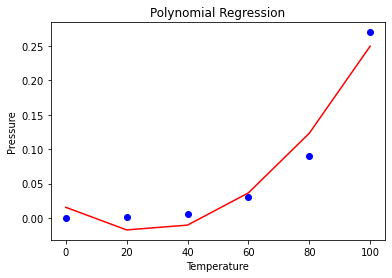

In [68]:
import matplotlib.pyplot as plt
import numpy as np
plt.scatter(x,y,color="blue")
plt.plot(x,y_pred,color="red")
plt.xlabel("Temperature")
plt.ylabel("Pressure")
plt.title("Polynomial Regression")
plt.show()

In [69]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
import numpy as np
print("RMSE : ",np.sqrt(mean_squared_error(y,y_pred)))
print("MAE : ",mean_absolute_error(y,y_pred))
print("R2 Score : ",r2_score(y,y_pred))

RMSE :  0.020000258331664956
MAE :  0.01836000000000014
R2 Score :  0.9568461098911795


In [70]:
print(model_poly)

[[1.0e+00 0.0e+00 0.0e+00]
 [1.0e+00 2.0e+01 4.0e+02]
 [1.0e+00 4.0e+01 1.6e+03]
 [1.0e+00 6.0e+01 3.6e+03]
 [1.0e+00 8.0e+01 6.4e+03]
 [1.0e+00 1.0e+02 1.0e+04]]


In [71]:
import pandas as pd
df=pd.read_csv("car_data.csv")
df

,Horsepower,Weight,MPG
0,130,3504,18
1,165,3693,15
2,150,3436,18
3,140,3433,16
4,198,4341,14
5,220,4354,12
6,95,2372,25
7,88,2130,27
8,98,2228,24


In [86]:
x=df.iloc[:,0:2]
y=df.iloc[:,2]
print(x.shape)
print(y.shape)

(9, 2)
(9,)


In [87]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2)
model_poly=poly.fit_transform(x)
lr=LinearRegression()
lr.fit(model_poly,y)

LinearRegression()

In [88]:
y_pred=lr.predict(model_poly)
y_pred

array([17.58990191, 15.27698091, 16.60522319, 17.47228707, 13.89891623,
       12.09413091, 25.02142509, 26.60535637, 24.43577831])

In [89]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
import numpy as np
print("RMSE : ",np.sqrt(mean_squared_error(y,y_pred)))
print("MAE : ",mean_absolute_error(y,y_pred))
print("R2 Score : ",r2_score(y,y_pred))

RMSE :  0.7244242439753568
MAE :  0.5112449562376433
R2 Score :  0.979060084085714
